In [1]:
from lib.gen_data import get_ffjord_data, get_toy_names
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# print available toy data names
toy_names = get_toy_names()
print(toy_names)

['8gaussians', 'swissroll', 'circles', 'rings', 'moons', 'pinwheel', '2spirals', 'checkerboard', 'line', 'cos']


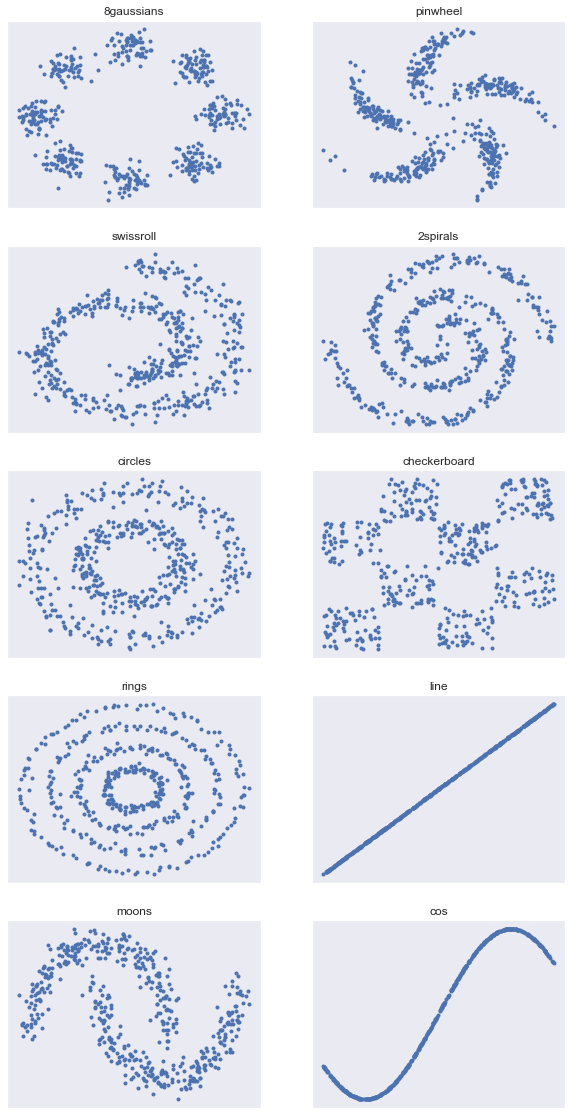

In [3]:
N = len(toy_names)
N_ = int(N/2)
f, ax = plt.subplots(N_, 2, figsize=(10, 20))
for i in range(N):
    # generate data
    name = toy_names[i]
    data = get_ffjord_data(name, 500)

    # plot data
    axi = ax[i%N_, int(i/N_)]
    axi.set_title(name)
    axi.get_xaxis().set_visible(False)
    axi.get_yaxis().set_visible(False)
    axi.plot(data[:, 0], data[:, 1], '.')
plt.show()

# Inspect Omniglot Data

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST, CIFAR10, \
    Omniglot
from torchvision.transforms import Compose, ToTensor, \
    Lambda, Normalize, Resize, CenterCrop

In [14]:
# binarize transformation
def binarize(x):
    return torch.bernoulli(x)

def inv_binarize(x):
    return 1 - torch.bernoulli(x)

# Define data transform
data_transform = [
    ToTensor(),
    Lambda(inv_binarize)
]
data_transform.append(Resize(28))
data_transform.append(CenterCrop(28))

# get Omniglot data
train_data = Omniglot('./data/', download=True, transform=Compose(data_transform))

# define split
data_split = [15424, 3856]

# split into training and validation sets
train_set, val_set = torch.utils.data.random_split(train_data, data_split)

# Setup data loaders
train_loader = DataLoader(
    train_set,
    batch_size=128,
    shuffle=True
)
val_loader = DataLoader(
    val_set,
    batch_size=128,
    shuffle=False
)

# get a batch
x, y = next(iter(train_loader))

Files already downloaded and verified


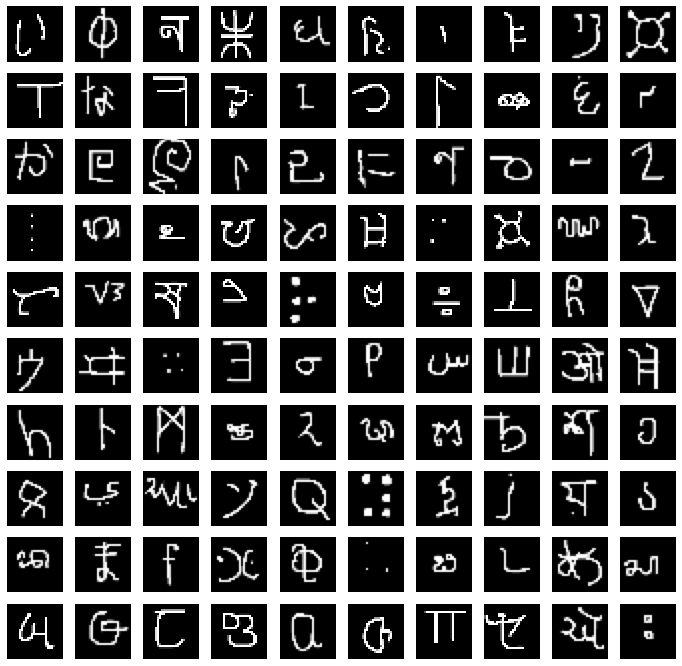

In [15]:
# display 100 images
n = 10
f, ax = plt.subplots(n, n, figsize=(12, 12))
for i in range(n):
    for j in range(n):
        idx = n*i + j
        ax[i, j].imshow(x[idx][0], cmap='gray')
        ax[i, j].axis('off')
plt.show()